#  Assignment 3 - Natural Language Generation 💬

Welcome to the **third and last assignment** for the **CS-552: Modern NLP course**!

> - 😀 Name: **Abdurrahman Said Gürbüz**
> - ✉️ Email: **said.gurbuz@epfl.ch**
> - 🪪 SCIPER: **369141**

In [1]:
# TODO: Please enter you sciper as a variable below
SCIPER = 369141

<div style="padding:15px 20px 20px 20px;border-left:3px solid green;background-color:#e4fae4;border-radius: 20px;color:#424242;">

## **Assignment Description**
- In this assignment, you will be working on natural language generation (NLG). You will be exploring various ways to generate text and demonstrate your understanding of decoding algorithms, the effect of their parameters, and NLG evaluation.
    
- In Part 1, you will implement two decoding algorithms (greedy and beam search), as well as two sampling algorithms (top-p and top-k) to replicate (to some extent) what one would get when using Huggingface's `generate` function that you've played with during the Week 6's exercise session.

- For Part 2, you will be implementing Contrastive Decoding, a method that combines the logits of two models at generation time.
    
- For Part 3, you will be evaluating NLG metrics for machine translation.

### Table of Contents
- **[Setup](#setup)**
    - [1) Google Setup](#1-google-colab-setup)
    - [2) Local Setup](#2-local-setup)
    - [3) Rest of the Setup](#3-rest-of-the-setup-colab-and-local)

- **[PART 1: NLG Decoding and Sampling Algorithms](#part-1-nlg-decoding-and-sampling-algorithms)**
    - [1.1) Implement decoding and sampling algorithms](#11-implement-decoding-and-sampling-algorithms)
    - [1.2) Test your implementations](#12-testing-your-implementation)
    
- **[PART 2: Constractive Decoding](#part-2-contrastive-decoding)**
    - [2.1) Implement the contrastive decoding method with adaptive plausibility constraint](#21-implement-contrastive-decoding-with-adaptive-plausibility-constraint)
    - [2.2) Evaluate your generations using the MAUVE metric](#22-evaluate-your-generations-using-the-MAUVE-metric)

- **[PART 3: MT Evaluation](#part-3-mt-evaluation)**
    - [3.1) Dataset and metrics analysis](#31-dataset-and-metrics-analysis)
    - [3.2) NLG metric calculation](#32-nlg-metric-calculation)
    - [3.3) Correlation calculation](#33-correlation-calculation)
    - [3.4) Correlation analysis](#34-correlation-analysis)

- **[PART 4: Checklist](#part-4-checklist)**
    
### Deliverables

To give us the deliverables you will have to commit the following files to your github classroom repository:

- ✅ The jupyter notebook: `a3_notebook.ipynb`

- ✅ The python files:
    - [x] `a3_utils.py`, if you added any helper functions
    - [x] `a3_decoding.py`
    - [x] `a3_sampling.py`
    - [x] `a3_contrastive_decoding.py`
    - [x] `a3_contrastive_main.py`
    - [x] `a3_mt_eval.py`

- ✅ The Part 3 open answer MD file: `a3_mt_qa.md`

- ✅ The JSON files generated in Parts 2 & 3: 
    - [x] `part2_contrastive_generations.json`
    - [x] `part2_greedy_generations.json`
    - [x] `part3_metrics.json` 
    - [x] `part3_corr.json`

### Expected Workload & Resources

We expect the first part of the assignment, notably Beam search, to be the longest part of the assignment. You can plan your workload according to that. Keep in mind that this is just our expectation, the same may not apply to everyone! It would be helpful to finish Part 1 to do Part 2. Part 3 can be done independently.

This assignment does not necessarily require a GPU to be completed (*i.e.*, there is no training -- only inference), although some processes such as decoding and model-based metric calculation can be sped up on GPU. Therefore for Part 1's beam search, all of Part 2, and Part 3's metric calculation it may be a good idea to use a GPU.

### Grade Breakdown
Here is the general grade breakdown per section, to help with prioritization:

- Part 1: Decoding & Sampling algorithms (100)
    - Greedy decoding: 15
    - Beam decoding: 40
    - Top-k sampling: 20
    - Top-p sampling: 25
- Part 2: Contrastive Decoding (60)
- Part 3: MT Evaluation (60)

</div>

## Setup

First, if you are using Google Colab, go through part (1) and (3) of the setup section. If not, and you are using a local machine, go through the part (2) and (3) of the setup section.

- **PYTHON VERSION:** Colab uses **Python version 3.10.12** and that's the python version we will use to grade your assignments. If you use a different Python version, we will not deduct points! Just know that it may affect reproducibility of your code. So try to stick to this one.

- **PACKAGE VERSIONS:** We will not deduct points if you use different package versions.

### 1) Google Colab Setup

If you are using Google Colab for this assignment, you will need to run a few commands to set up our environment. If you are running this notebook on a local machine you can skip this section.
Run the following cell to mount your Google Drive. Follow the popped window, sign in to your Google account (*i.e.* the same non-EPFL account you used to store this notebook)

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

Now first click the 4th left-side button (named Files), then click the 2nd button that pops under in the columns (named Refresh), under "/drive/MyDrive/" find the Assignment 3 repository folder that you uploaded to your Google Drive, copy its path, and fill it in the cell below. If everything is working correctly, then running the folowing cell should print the filenames from the assignment:

```
['part3_metrics.json', 'a3_eval_mauve.py', 'requirements.txt', 'figs', 'a3_sampling.py', 'README.md', 'a3_decoding.py', 'a3_tests.py', 'a3_contrastive_main.py', 'a3_contrastive_decoding.py', 'a3_mt_eval.py', 'a3_mt_qa.md', 'part3_corr.json', 'data', 'a3_utils.py', 'a3_notebook.ipynb']
```

In [ ]:
# import os
# # TODO: Fill in the `ROOT_PATH` with where you download the Assignment folder
# ROOT_PATH = "/content/drive/MyDrive/..."  # Replace with your directory to A3 folder
# print(os.listdir(ROOT_PATH)) # Check the content of the path
# os.chdir(ROOT_PATH) # cd into directory
# print(os.listdir(".")) # Check the content of current folder

And the following cell should read "Hello, this is A3! You successfully linked your directory to Colab."


In [ ]:
# from a3_tests import hello_A3
# hello_A3()

Before we start, we also need to run some boilerplate code to set up our environment, same as previous assignments.

In [ ]:
# requirements = ROOT_PATH + "/requirements.txt"
# %pip install -r {requirements}

### 2) Local Setup

If you are using a local setup, then make sure you have a python environment create for Python 3.10.12. For example you can use the following command to create a conda environment if you haven't done so for previous exercises or assignments:

```shell
conda create -n="mnlp-venv" python=3.10.12
conda activate mnlp-venv
```

And download the requirements:
```
pip install -r requirements.txt
```

And then make sure to set the kernel of this notebook to that environment.

Below please write your relative filepath to your assignment 3 folder. If everything is working correctly, then running the folowing cell should print the filenames from the assignment:

```
['part3_metrics.json', 'a3_eval_mauve.py', 'requirements.txt', 'figs', 'a3_sampling.py', 'README.md', 'a3_decoding.py', 'a3_tests.py', 'a3_contrastive_main.py', 'a3_contrastive_decoding.py', 'a3_mt_eval.py', 'a3_mt_qa.md', 'part3_corr.json', 'data', 'a3_utils.py', 'a3_notebook.ipynb']
```

In [2]:
import os

ROOT_PATH = "."
print(os.listdir(ROOT_PATH))

['will_be_removed.py', 'part3_metrics.json', '.DS_Store', 'a3_eval_mauve.py', 'requirements.txt', 'figs', 'a3_sampling.py', 'a3_decoding_first.py', 'part2_contrastive_generations.json', '__pycache__', 'README.md', '.gitignore', 'a3_decoding.py', 'a3_tests.py', 'a3_contrastive_main.py', 'will_be_removed_utils.py', 'a3_contrastive_decoding.py', 'a3_decoding_old.py', 'a3_mt_eval.py', 'a3_mt_qa.md', 'a3_notebook_2.ipynb', 'part3_corr.json', '.git', 'data', 'a3_tests_old.py', 'part2_greedy_generations.json', 'a3_utils.py', 'a3_notebook.ipynb']


### 3) Rest of the setup (Colab and Local)

Now, run this cell to load the autoreload extension. This allows us to edit `.py` source files, and re-import them into the notebook for a seamless editing and debugging experience without needing to restart the kernel.

In [3]:
%load_ext autoreload
%autoreload 2

from a3_utils import *
from a3_tests import *

import json
import torch
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM
)

seed = SCIPER
torch.manual_seed(seed) # example to set the seed for randomness control
torch.set_printoptions(precision=16) # set print number precision at 16

/Users/saidgurbuz/miniconda3/envs/cs-552-a3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(Optional) If you would like to setup CUDA with your notebook you can check whether it's available or not. If not, either your local machine doesn't have GPUs or you need to change your runtime type to a GPU setting via `Edit -> Notebook Settings` on Colab.

In [4]:
if torch.cuda.is_available():
    print("GPU is available! Good to go.")
elif torch.backends.mps.is_available():
    print("MPS is available! Good to go.")
else:
    print(
        "If you are using Colab, please set your runtime type to a GPU via {Edit -> Notebook Settings}."
    )

MPS is available! Good to go.


And that's it! You are ready to start the assignment.

## **PART 1: NLG Decoding and Sampling Algorithms**
---

### 1.1) Implement decoding and sampling algorithms

For this part of the assignment, you will be implementing decoding and sampling algorithms that are in `a3_decoding.py` and `a3_sampling.py` files. These files include a main function that print the behavior of your own implementation and the huggingface `transformers` implementation.

[GPT-2](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf), is an autoregressive decoder-only Transformer model.
We expect your algorithms to only work on GPT-2 variants (e.g. `gpt2`, `gpt2-medium`, `gpt2-large`) -- although we will particularly provide you examples that work well on an instruction-finetuned version of GPT-2 small called `vicgalle/gpt2-alpaca-gpt4`, so feel free to just test on that one. To do inference with GPT-2, we use the generic `AutoModelForCausalLM` to load the `GPT2LMHeadModel` class (provided by the `transformers` package). We recommend you closely look at the [GPT2LMHeadModel documentation](https://huggingface.co/docs/transformers/model_doc/gpt2#transformers.GPT2LMHeadModel) to understand what the model expects as input and outputs.

<div style="padding:15px 20px 20px 20px;border-left:3px solid red;background-color:#C88B86;border-radius: 20px;color:#424242;">

#### ⚠️ **Warning** ⚠️

Here are some important points to not miss:
- We do not allow you to use the huggingface `generate` function. The point of the exercise is to implement the algorithms yourself.

- Please carefully read the detailed docstrings and the comments that start with `TODO` / `NOTE: caution`. While the `TODO`s will show where you should add code, the caution notes will point out what not to change.

- Feel free to add testing cells below those already provided in this notebook (in [1.2) Test your implementations](#12-testing-your-implementation)). You are also welcome to write tests in the main function of `a3_decoding.py` and `a3_sampling.py`

- **Decoding algorithms expectations:**
    - **Greedy:** your greedy decoder output **should** match huggingface's output. 
    - **Beam:** 
        - **Scores:** Sometimes for beam search, due to floating point precision or simply the way huggingface counts scores (*e.g.*, they sometimes threshold log probabilities), your scores may not align with theirs. Just aim for it to be around the same ballpark (~0.01 difference, but again we won't be so clear cut with this). We are not measuring how well you can replicate huggingface's implementation to the exact number. Therefore we will be flexible about this as long as your algorithm does the steps required. 
        - **Runtime:** Also, a `num_beams` larger than 15 can run longer than a minute; you don't have to write the most efficient beam search.

- **Sampling algorithms expectations:** Due to slight implementation differences (*e.g.*, how you decide to *not* sample certain tokens), even if the random seed is set at testing time, your results may widely differ. Therefore if the output and its shape do not match exactly huggingface's output for sampling algorithms, you don't have to worry (and if they do, you don't have to worry either :D). In this tricky case, you can verify your implementation by playing with the parameters and seeing if they behave the way you would expect (Hint: think about the extreme cases of these algorithms and check if the algorithms behaves as you expect in those cases).

- **Read the documentation:** We already provide you with hints on how to pass tokens to the model (below and as a comment in the code), however you are responsible with reading the [documentation](https://huggingface.co/docs/transformers/model_doc/gpt2#transformers.GPT2LMHeadModel) to fully understand what the `model` function expects as input and what the model returns. This way you will figure out how to unroll the decoding process.

<div/>

Here is a reasonable order to implement the classes and features in these python files, although you are welcome to do it in a different order:
- 🎯 Implement the `search` function in `GreedySearchDecoderForCausalLM` class in `a3_decoding.py`
- 🎯 Implement the `search` function in `BeamSearchDecoderForCausalLM` class in `a3_decoding.py` without *length_penalty*
- 🎯 Add *length_penalty* to the `BeamSearchDecoderForCausalLM` class in `a3_decoding.py`
- 🎯 Implement the `sample` function in `TopKSamplerForCausalLM` class in `a3_sampling.py` without *temperature*
- 🎯 Implement the `sample` function in `TopPSamplerForCausalLM` class in `a3_sampling.py` without *temperature*
- 🎯 Add *temperature* functionality to both `TopKSamplerForCausalLM` and `TopPSamplerForCausalLM`

**Do not try to implement all of them at once without testing.** For example, understanding why your greedy implementation fails can inform the rest. So keep testing your code in between the different algorithms. You can modify the main function in these files to test your functions. We have also created the following cells to call your functions and see if they implement the features we request. These tests do not cover all cases. We don't expect you to throw errors when the inputs don't match their constraints, but whenever the constraints are not met, we return None and print statements to help you debug.

<div style="padding:15px 20px 20px 20px;border-left:3px solid purple;background-color:#9A7696;border-radius: 20px;color:#424242;">

#### **Hints**

**Hint (#1):** There are 2 ways to pass the inputs to the model. Please open the
[GPT2LMHeadModel documentation](https://huggingface.co/docs/transformers/model_doc/gpt2#transformers.GPT2LMHeadModel) and read the `Parameters` and `Returns` sections while looking at these hints. Either of these approaches is fine since we 
don't expect the most efficient solution, but they depend on how you decide to unroll the decoding process:

  1. **If recomputing the past decoder processes at each decoding step:**
      Since the tokenizer's output dictionary keys matches these `Parameter` 
      i.e. arguments of the model you can directly do:
      ```python
      >> self.model(**inputs)
      ```
      Just be careful and think about how you modify the "input_ids" 
      and "attention_mask" keys across decoding steps. 
  
  2. **If using cached decoder hidden states at each decoding step:**
      To speed up the process (although *not required*) you can also get 
      the computed key/values hidden-states *so far* with `use_cache=True`
      where in the first step you may need to do:
      ```python
      >> self.model(**inputs, use_cache=True)
      ```
      This will return an extra dictionary entry called "past_key_values".
      In the next steps you would do, assuming your previous output 
      dict is called `outputs`:
      ```python
      >> self.model(**inputs, use_cache=True, past_key_values=outputs["past_key_values"])
      ```
      Again, be careful as to how you modify the "input_ids" and 
      "attention_mask" keys across decoding steps. In particular the 
      cached setting expects them to be different from the non-cached 
      setting. Read the `Parameters` and `Returns` sections of the 
      GPT2LMHeadModel carefully.

**Hint (#2):** You can implement and use the `self.prepare_next_inputs` function 
in `a3_utils.py` inherited by all decoding and sampling classes 
(although you are not required to) to reduce repeated code and make it more readable.
There isn't a unique solution for this so use it as you wish or create another function in this super class.

**Hint (#3):** If you create a new tensor `tensor_b` and want it to be on the same device as another tensor `tensor_a`, you can do `tensor_b = tensor_b.to(tensor_a.device)`

<div/>

### 1.2) Testing your implementation

Let's first load up the relevant language modeling class, its tokenizer, and the three datapoints you can test your algortihm on. Then we will create instances of our decoding and sampling classes. As mentioned before, you can test your implementation on an instruction-tuned GPT-2 small that we found on [Huggingface Model Hub](https://huggingface.co/vicgalle/gpt2-alpaca-gpt4) called `vicgalle/gpt2-alpaca-gpt4`. In short, this means that the model was further finetuned on a dataset in the format of instructions followed by demonstrations. The instruction datapoints come from the [Alpaca](https://crfm.stanford.edu/2023/03/13/alpaca.html) dataset, which, if you are curious about, you can load with:

```python
>> from datasets import load_dataset
>> dataset = load_dataset("tatsu-lab/alpaca")
```

But note that our final testing will not necessarily be on these, so don't try to hardcode your solutions to it ;)

> References: Here is the [Alpaca](https://crfm.stanford.edu/2023/03/13/alpaca.html) and [Self-Instruct](https://arxiv.org/abs/2212.10560) paper if you are interested in the topic of instruction tuning!

In [5]:
################################################################################
# 1) Load model and tokenizer
# model_name = "gpt2" # NOTE: the quality of the generations will be low if you use gpt2
model_name = "vicgalle/gpt2-alpaca-gpt4"
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token_id = tokenizer.eos_token_id
model = AutoModelForCausalLM.from_pretrained(model_name)
MAX_SEQ_LENGTH = tokenizer.model_max_length

################################################################################
# 2) Load relevant data
with open(os.path.join(ROOT_PATH, "data", "part1_input_data.json"), "r") as read_file:
    input_data = json.load(read_file)

# 3) Format the data in the instruction template: in particular,
#    we follow the template the model was finetuned on
all_inputs = []
for i, entry in enumerate(input_data):
    print("-" * 50)
    print(f"Entry #{i + 1}:")
    print("-" * 40)
    final_text = ""
    if entry["input"] == "":
        final_text = "Below is an instruction that describes a task. Write a response that appropriately completes the request."
        final_text += "\n\n### Instruction:\n" + entry["instruction"]
    else:
        final_text = "Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request."
        final_text += "\n\n### Instruction:\n" + entry["instruction"]
        final_text += "\n\n### Input:\n" + entry["input"]
    final_text += "\n\n### Response:\n"

    print(final_text)

    ############################################################################
    # 4) Tokenize the relevant text
    curr_inputs = tokenizer(
        final_text,
        max_length=MAX_SEQ_LENGTH,
        truncation=True,
        return_tensors="pt",
    )

    all_inputs.append([f"Entry #{i + 1}", curr_inputs])

--------------------------------------------------
Entry #1:
----------------------------------------
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given an economic concept, define it in simple terms.

### Input:
Inflation

### Response:

--------------------------------------------------
Entry #2:
----------------------------------------
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Generate a poem about spring.

### Response:

--------------------------------------------------
Entry #3:
----------------------------------------
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Generate a list of ten items a person might need for a camping trip

### Response:



In [6]:
################################################################################
# 4) Put model & inputs on CUDA if available
print("-" * 50)
print("CUDA:")
print("-" * 40)


def get_device():
    device = None
    # # NOTE: Feel free to uncomment the "mps" lines if you want to use the ARM GPU.
    # if torch.backends.mps.is_available():
    #     device = torch.device("mps")
    #     return device
    if torch.cuda.is_available():
        # TODO: if you want a specific GPU, you can choose which device here,
        #       otherwise picks the default 0 ID-ed GPU
        device = torch.device("cuda:0")
        print("CUDA was available, successfully put inputs and model on GPU device.")
    else:
        device = torch.device("cpu")
        print("Not putting inputs and model on any GPU device.")
    return device


device = get_device()
model = model.to(device)
for _, inputs in all_inputs:
    inputs["input_ids"] = inputs["input_ids"].to(device)
    inputs["attention_mask"] = inputs["attention_mask"].to(device)

--------------------------------------------------
CUDA:
----------------------------------------
Not putting inputs and model on any GPU device.


Perfect! Now you can use the following tests to debug the behavior of your model. Feel free to play around with the parameters but do not change the `tests.py` file. If you do, it won't affect your grading, but you might not get the right results when testing.

#### 1.2.a) Greedy search test

Greedy search is the first thing you can implement. The output here should match the huggingface implementation. Make sure you implement the *max_new_tokens* parameter behavior right!
- 🎯 You need to implement the `search` function in `GreedySearchDecoderForCausalLM` class in `a3_decoding.py` to run this test


In [7]:
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
random.seed(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [8]:
from importlib import reload
import a3_tests
reload(a3_tests)
from a3_tests import greedy_test

# 1) Relevant parameters to greedy search
max_new_tokens = 20

# 2) Run it on the 3 examples
greedy_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    verbose=True,  # NOTE: set it to True/False to show/hide the decoded sequence, can help debugging
    with_color=True,  # NOTE: set it to True/False to choose whether to display
    #                         the input sequence (red) and the generated sequence (green) in diff colors
)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Greedy Tests
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------
Input:  Entry #1
--------------------------------------------------
~ Your Implementation ~
Generated sequence: 
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given an economic concept, define it in simple terms.

### Input:
Inflation

### Response:
Inflation is the rate at which the value of a currency fluctuates over time. It is the
Output shape:  torch.Size([1, 71])
--------------------
~ Huggingface Implementation ~
Generated sequence: 
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given an economic conce

#### 1.2.b) Beam search test without length penalty

Next, we implement beam search. First, implement it without length penalty and see if the log probability scores you get are roughly close to huggingface's for different beam sizes (particularly smaller ones). The sequence should be mostly the same, independent of the beam width.
- 🎯 You need to implement the `search` function in `BeamSearchDecoderForCausalLM` class in `a3_decoding.py` to run this test (you don't have to implement the *length_penalty* feature to run it)

In [9]:
from importlib import reload
import a3_tests
reload(a3_tests)
from a3_tests import beam_test

# 1) Relevant parameters to beam search
max_new_tokens = 15
num_beams = 4
num_return_sequences = 4
length_penalty = 0.0

# 2) Run it on the 3 examples
beam_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    num_beams,
    length_penalty,
    num_return_sequences,
    verbose=True,  # NOTE: set it to True/False to show/hide the decoded sequence, can help debugging
    with_color=True,  # NOTE: set it to True/False to choose whether to display
    #                         the input sequence (red) and the generated sequence (green) in diff colors
)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Beam Tests
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------
Input:  Entry #1
--------------------------------------------------
~ Your Implementation ~
1. score: -9.558432579040527
1. Generated sequence:
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given an economic concept, define it in simple terms.

### Input:
Inflation

### Response:
Inflation is the rate at which the purchasing power of a currency fluctuates
2. score: -9.595183372497559
2. Generated sequence:
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given an economic concept, define it in simple terms.

### I

#### 1.2.c) Beam search test with length penalty

Next, we implement length penalty for beam search. We do so by dividing the score (sum of the log probabilities) by the length of the generation exponentiated by the penalty. 
- 🎯 You need to implement the `search` function in `BeamSearchDecoderForCausalLM` class in `a3_decoding.py` with *length_penalty* to run this test. Make sure the no penalty setting outcome has not changed.

In [10]:
from importlib import reload
import a3_tests
reload(a3_tests)
from a3_tests import beam_test

# 1) Relevant parameters to beam search + penalty
max_new_tokens = 15
num_beams = 5
num_return_sequences = 3
length_penalty = 1.5

# 2) Run it on the 3 examples
beam_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    num_beams,
    length_penalty,
    num_return_sequences,
    verbose=True,  # NOTE: set it to True/False to show/hide the decoded sequence, can help debugging
    with_color=True,  # NOTE: set it to True/False to choose whether to display
    #                         the input sequence (red) and the generated sequence (green) in diff colors
)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Beam Tests
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------
Input:  Entry #1
--------------------------------------------------
~ Your Implementation ~
1. score: -0.16453179505793386
1. Generated sequence:
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given an economic concept, define it in simple terms.

### Input:
Inflation

### Response:
Inflation is the rate at which the purchasing power of a currency fluctuates
2. score: -0.1651644944908559
2. Generated sequence:
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given an economic concept, define it in simple terms.

##

In [11]:
from importlib import reload
import a3_tests
reload(a3_tests)
from a3_tests import beam_test

# 1) Relevant parameters to beam search + penalty
max_new_tokens = 25
num_beams = 5
num_return_sequences = 3
length_penalty = -1.5

# 2) Run it on the 3 examples
beam_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    num_beams,
    length_penalty,
    num_return_sequences,
    verbose=False,  # NOTE: set it to True/False to show/hide the decoded sequence, can help debugging
    with_color=True,  # NOTE: set it to True/False to choose whether to display
    #                         the input sequence (red) and the generated sequence (green) in diff colors
)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Beam Tests
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------
Input:  Entry #1
--------------------------------------------------
~ Your Implementation ~
1. score: -2172.3763942718506
2. score: -2228.687047958374
3. score: -2356.4722537994385
Output shape:  torch.Size([3, 76])
--------------------
~ Huggingface Implementation ~
1. score: -2172.37646484375
2. score: -2228.68701171875
3. score: -2356.47216796875
Output shape:  torch.Size([3, 76])
--------------------
~ Summary ~
Output IDs matching:  ['✅', '✅', '✅']
Output shape matching:  ✅
Scores approximately close (to 0.01 decimal):  ['✅', '✅', '✅']


--------------------------------------------------
Input:  Entry #2
--------------------------------------------------
~ Your Implementation ~
1. score: -3063.176155090332
2. score: -3107.607364654541
3. score: -3127.7987957000

#### 1.2.d) Top-K sampling without the temperature feature

Next, we implement top-k sampling. First, implement it without the temperature feature.
- 🎯 You need to implement the `sample` function in `TopKSamplerForCausalLM` class in `a3_sampling.py` to run this test (you don't have to implement the *temperature* feature to run it)

In [12]:
from importlib import reload
import a3_tests
reload(a3_tests)
from a3_tests import top_k_test

# 1) Relevant parameters to top-k sampling
max_new_tokens = 20
top_k = 15
temperature = 1.0
seed = SCIPER

# 2) Run it on the 3 examples
top_k_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    top_k,
    temperature,
    seed,
    verbose=True,  # NOTE: set it to True/False to show/hide the decoded sequence, can help debugging
    with_color=True,  # NOTE: set it to True/False to choose whether to display
    #                         the input sequence (red) and the generated sequence (green) in diff colors
)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Top-k Tests
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------
Input:  Entry #1
--------------------------------------------------
~ Your Implementation ~
Generated sequence: 
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given an economic concept, define it in simple terms.

### Input:
Inflation

### Response:
The inflation is defined as an increase in the price of one kind of material or service that is generally
Output shape:  torch.Size([1, 71])
--------------------
~ Huggingface Implementation ~


/Users/saidgurbuz/miniconda3/envs/cs-552-a3/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:535: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


Generated sequence: 
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given an economic concept, define it in simple terms.

### Input:
Inflation

### Response:
Inflation is the rise in the price of an economic product or service over its intended use or consumption
Output shape:  torch.Size([1, 71])
--------------------------------------------------
Input:  Entry #2
--------------------------------------------------
~ Your Implementation ~
Generated sequence: 
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Generate a poem about spring.

### Response:
A soft summer's breeze rustles your skin,
Spring leaves sway under your feet,
Nature
Output shape:  torch.Size([1, 50])
--------------------
~ Huggingface Implementation ~
Generated sequence: 
Below is an instruction that describes a task

#### 1.2.e) Top-P sampling without the temperature feature

Then, we implement top-p sampling. First, implement it without temperature.
- 🎯 You need to implement the `sample` function in `TopPSamplerForCausalLM` class in `a3_sampling.py` to run this test (you don't have to implement the *temperature* feature to run it)


In [13]:
from importlib import reload
import a3_tests
reload(a3_tests)
from a3_tests import top_p_test

# 1) Relevant parameters to top-p
max_new_tokens = 20
top_p = 0.92
temperature = 1.0
seed = SCIPER

# 2) Run it on the 3 examples
top_p_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    top_p,
    temperature,
    seed,
    verbose=True,  # NOTE: set it to True/False to show/hide the decoded sequence, can help debugging
    with_color=True,  # NOTE: set it to True/False to choose whether to display
    #                         the input sequence (red) and the generated sequence (green) in diff colors
)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Top-p Tests
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------
Input:  Entry #1
--------------------------------------------------
~ Your Implementation ~
Generated sequence: 
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given an economic concept, define it in simple terms.

### Input:
Inflation

### Response:
The term inflation refers to a change in the rates of economic growth or inflation in a given year.
Output shape:  torch.Size([1, 71])
--------------------
~ Huggingface Implementation ~
Generated sequence: 
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given an ec

#### 1.2.f) Temperature for both sampling

Now let's test what happens when you implement both sampling algorithms with temperature.

- 🎯 Add the *temperature* feature to both `TopKSamplerForCausalLM` and `TopPSamplerForCausalLM` classes in `a3_sampling.py` to run this test. Make sure the default no temperature setting outcome (*i.e.*, when `temperature=1.0`) has not changed.

In [14]:
from importlib import reload
import a3_tests
reload(a3_tests)
from a3_tests import top_k_test, top_p_test

# 1) Relevant parameters to sampling
max_new_tokens = 20
top_k = 15
top_p = 0.92
temperature = 0.7
seed = SCIPER

# 2) Run it on the 3 examples
top_k_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    top_k,
    temperature,
    seed,
    verbose=True,
    with_color=True,
)

print()
top_p_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    top_p,
    temperature,
    seed,
    verbose=True,
    with_color=True,
)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Top-k Tests
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------
Input:  Entry #1
--------------------------------------------------
~ Your Implementation ~
Generated sequence: 
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given an economic concept, define it in simple terms.

### Input:
Inflation

### Response:
Inflation is a measure of the rise or fall in the purchasing power of a currency. It is
Output shape:  torch.Size([1, 71])
--------------------
~ Huggingface Implementation ~
Generated sequence: 
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given an economic conce

## **PART 2: Contrastive Decoding**
---

<!-- ![Contrast Decoding Figure](figs/cd_figure.png) -->
<center><img width="500" src="https://raw.githubusercontent.com/epfl-nlp/cs-552-modern-nlp/a64d201fb5fb359299769067dfd47bead4b30f94/Exercises/Week%206%20-%20Text%20Generation/figs/cd_figure.png"/></center>

**Paper Link**: https://arxiv.org/abs/2210.15097

In this section, you will be implementing the [Contrastive Decoding](https://arxiv.org/abs/2210.15097) (CD) method.
The CD objective returns the difference between the likelihood of two language models (LMs): an expert model and an amateur model. The expert LM is usually larger in size than the amateur one.

The intuition behind CD lies in the observation that the failures of larger LMs (e.g., repetition, incoherence) are even more prevalent in smaller LMs, and that this difference can be used as a signal to generate more plausible text. **Figure 1** above illustrates the CD method.

However, amateur LMs are not always mistaken: small language models still capture many simple aspects of English grammar and common sense (*e.g.*, subject-verb agreement). Thus, penalizing all behaviors from amateur LMs indiscriminately would penalize these simple aspects that are correct (False negative), and conversely reward implausible tokens (False positive). Therefore, the paper introduces the plausibility constraint, which complements the CD objective and avoids these failure modes.

#### 🎯 TODO: In order to understand how contrastive decoding works please read **Section 3** of [the paper](https://arxiv.org/abs/2210.15097). You do not need to read the other sections to understand the method.

### 2.1) Implement Contrastive Decoding with Adaptive Plausibility Constraint

In this implementation, you will use `GPT2-Large` as the expert model and `GPT2-Small` as the amateur model (referred to as `gpt2-large` and `gpt2` on HuggingFace respectively). You will be using a subset of the [CC-News](https://huggingface.co/datasets/cc_news) dataset, which contains news articles from news sites all over the world. The task is to take the first 32 tokens of each article as the prompt, then continue generating the next 128 tokens using the Contrastive Decoding (CD) objective subject to the adaptive plausibility constraint.

🎯 TODO - The files you should now look at are:

1. `a3_contrastive_main.py`: Just read this file to understand how the data is processed.
2. `a3_contrastive_decoding.py`
    - In this second file there are two main functions you will be implementing:
        - `greedy_search_with_contrastive_decoding`
        - `filter_using_adaptive_plausibility_constraint`

You can interface with these files using command line arguments as shown below.

<div style="padding:15px 20px 20px 20px;border-left:3px solid red;background-color:#C88B86;border-radius: 20px;color:#424242;"> 

⚠️ **Warning** ⚠️
Note that `GPT2-Large` will take 3.25GB of disk space and `GPT2-Small` 548MB, so make sure you have enough space for both of them (or use COLAB 😄)
</div>


In [ ]:
# # NOTE: you can uncomment and run the following if Colab gives you "NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968"
# #       the problem stems from having to many output text
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [5]:
!python a3_contrastive_main.py \
    --model_name_or_path gpt2-large \
    --amateur_name_or_path gpt2 \
    --decoding-mode contrastive \
    --amateur_temperature 0.5 \
    --max-new-tokens 128 \
    --num-generations 50 \
    --alpha 0.1 \
    --outfile part2_contrastive_generations.json

04/12/2024 00:38:08 - WARNING - __main__ - device: cpu
> Using Contrastive Decoding
tokenizer_config.json: 100%|█████████████████| 26.0/26.0 [00:00<00:00, 47.1kB/s]
vocab.json: 100%|██████████████████████████| 1.04M/1.04M [00:00<00:00, 1.83MB/s]
merges.txt: 100%|████████████████████████████| 456k/456k [00:00<00:00, 2.80MB/s]
tokenizer.json: 100%|██████████████████████| 1.36M/1.36M [00:00<00:00, 2.15MB/s]
config.json: 100%|█████████████████████████████| 666/666 [00:00<00:00, 6.06MB/s]
model.safetensors: 100%|███████████████████| 3.25G/3.25G [08:47<00:00, 6.16MB/s]
config.json: 100%|█████████████████████████████| 665/665 [00:00<00:00, 5.16MB/s]
model.safetensors: 100%|█████████████████████| 548M/548M [01:29<00:00, 6.14MB/s]
generation_config.json: 100%|██████████████████| 124/124 [00:00<00:00, 1.00MB/s]
04/12/2024 00:48:32 - INFO - __main__ - Namespace(model_name_or_path='gpt2-large', amateur_name_or_path='gpt2', decoding_mode='contrastive', outfile='part2_contrastive_generations.json', 

#### 2.1.1) Do the same but using greedy search for comparison

In [6]:
!python a3_contrastive_main.py \
    --model_name_or_path gpt2-large \
    --decoding-mode greedy \
    --max-new-tokens 128 \
    --num-generations 50 \
    --outfile part2_greedy_generations.json

04/12/2024 01:08:28 - WARNING - __main__ - device: cpu
> Using Greedy Decoding
04/12/2024 01:08:31 - INFO - __main__ - Namespace(model_name_or_path='gpt2-large', amateur_name_or_path=None, decoding_mode='greedy', outfile='part2_greedy_generations.json', num_generations=50, max_new_tokens=128, amateur_temperature=1.0, alpha=0.1, seed=42, device=device(type='cpu'))
Dataset({
    features: ['text', 'input_ids', 'gold'],
    num_rows: 101
})
101 ["<|endoftext|> There's a surprising twist to Regina Willoughby's last season with Columbia City Ballet: It's also her 18-year-old daughter Melina", '<|endoftext|> The New York City Ballet Board of Directors announced on Saturday the interim team that has been appointed to run the artistic side of the company during ballet master in', "<|endoftext|> The Philadelphia Eagles and the New England Patriots aren't the only teams bringing Super Bowl entertainment this week. To celebrate game day (and cheer on their region's", '<|endoftext|> New York City 

### 2.2) Evaluate Your Generations Using The MAUVE Metric

Now that you have implemented contrastive decoding, let's make sure it's generating higher quality text than plain greedy decoding. For this we can use the MAUVE metric, which was introduced in [this paper](https://arxiv.org/abs/2102.01454). In short, MAUVE measures the distribution similarity between the set of generated text and the set of gold reference. 

In this part of the assignment you do not need to implement anything. However, please verify that the generations you get using the contrastive decoding method receive a higher score than the greedy generations.

In [17]:
# Evaluate contrastive decoding generations
!python a3_eval_mauve.py --filepath part2_contrastive_generations.json

50 50


2024-04-15 00:34:43.402094: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 00:34:43.402174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 00:34:43.404794: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 00:34:44.832921: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


48 48


Featurizing p: 100% 48/48 [00:25<00:00,  1.85it/s]
Featurizing q: 100% 48/48 [00:25<00:00,  1.89it/s]
WARNING clustering 96 points to 5 centroids: please provide at least 195 training points


Mauve Score: 0.9877983990404533


In [18]:
# Evaluate greedy generations
!python a3_eval_mauve.py --filepath part2_greedy_generations.json

50 50


2024-04-15 00:36:20.430097: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 00:36:20.430178: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 00:36:20.431711: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 00:36:21.848661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


48 48


Featurizing p: 100% 48/48 [00:25<00:00,  1.85it/s]
Featurizing q: 100% 48/48 [00:26<00:00,  1.84it/s]
WARNING clustering 96 points to 5 centroids: please provide at least 195 training points


Mauve Score: 0.16241579664693587


## **PART 3: MT Evaluation**
---

In this section, you will be evaluating several NLG metrics to understand which ones correlate best with human judgement when it comes to machine translation (MT), a popular task in NLG. We will first take a close look at one of the [Workshop on Statistical Machine Translation](https://aclanthology.org/venues/wmt/) (WMT) datasets. WMT provides several challenges each year it's hosted to evaluate MT systems (*e.g.* you can consider Google Translate as a system), and also to evaluate the metrics we use. You read that right: we will evaluate evaluation. While there are several WMT datasets that you can find [here](https://github.com/Unbabel/COMET/blob/master/data/README.md), we will focus on a Direct Assessment (DA) dataset.

### 3.1) Dataset and metrics analysis

The DA scores are human evaluation scores such that given a **source** (`src`) sentence from one source language and a target **reference** (`ref`) from a distinct target language, the annotator evaluates how good the **hypothesis** (`mt`), or, in other words, the prediction of the machine translation system is. Such scores are typically calculated by several metrics and then aggregated with weighing (also called Multidimensional Quality Metrics - MQM) or they can be raw scores on a given scale which are then normalized across annotators. The DA score in the dataset we will evaluate was collected in the latter way.

We subsampled a huggingface dataset instance of the WMT Shared Tasks which can be found [here](https://huggingface.co/datasets/RicardoRei/wmt-da-human-evaluation). In particular, we subsampled in each source sentence (`src`) and language pair (`lp`) group from 2019 such that we could get roughly equal amounts of data in each category. Let's do a quick analysis to get you accustomed to the data format:

In [5]:
import os
import pandas as pd


def cnt_unique_prop(dataset, prop_name, do_print=True):
    uniques = dataset[prop_name].unique().tolist()
    print("(" + prop_name + ") # of unique instances: ", len(uniques))
    if do_print:
        uniques.sort()
        print("(" + prop_name + ") unique instances: ", uniques, "\n")


wmt_da_df = pd.read_csv(os.path.join("data", "wmt-da-human-evaluation_filtered.csv"))
print("-" * 80)
print("Dataset properties: ")
print("-" * 80)
print("Dataset size: ", len(wmt_da_df))
print("Features: ", wmt_da_df.columns.to_list(), "\n")

cnt_unique_prop(wmt_da_df, "year", do_print=True)
cnt_unique_prop(wmt_da_df, "domain", do_print=True)
cnt_unique_prop(wmt_da_df, "lp", do_print=True)
cnt_unique_prop(wmt_da_df, "src", do_print=False)
cnt_unique_prop(wmt_da_df, "mt", do_print=False)
cnt_unique_prop(wmt_da_df, "ref", do_print=False)
cnt_unique_prop(wmt_da_df, "annotators", do_print=False)
cnt_unique_prop(wmt_da_df, "entry_id", do_print=False)

print("\nRange of DA:")
print("- max: ", wmt_da_df["score"].max())
print("- min: ", wmt_da_df["score"].min())

wmt_da_df.head()

--------------------------------------------------------------------------------
Dataset properties: 
--------------------------------------------------------------------------------
Dataset size:  1723
Features:  ['entry_id', 'lp', 'src', 'mt', 'ref', 'score', 'raw', 'annotators', 'domain', 'year'] 

(year) # of unique instances:  1
(year) unique instances:  [2019] 

(domain) # of unique instances:  1
(domain) unique instances:  ['news'] 

(lp) # of unique instances:  18
(lp) unique instances:  ['de-cs', 'de-en', 'de-fr', 'en-cs', 'en-de', 'en-fi', 'en-gu', 'en-kk', 'en-lt', 'en-ru', 'en-zh', 'fi-en', 'fr-de', 'gu-en', 'kk-en', 'lt-en', 'ru-en', 'zh-en'] 

(src) # of unique instances:  231
(mt) # of unique instances:  1670
(ref) # of unique instances:  380
(annotators) # of unique instances:  6
(entry_id) # of unique instances:  1723

Range of DA:
- max:  2.7928868839768
- min:  -4.69156456888686


,entry_id,lp,src,mt,ref,score,raw,annotators,domain,year
0,9841,de-cs,"18 Löcher, um ein Zeichen zu setzen.",18 jamek na ceduli.,18 jamek na to se ukázat.,-0.922435,51.0,1,news,2019
1,9842,de-cs,"18 Löcher, um ein Zeichen zu setzen.","18 děr, aby se dalo bojovat.",18 jamek na to se ukázat.,-1.615103,2.0,1,news,2019
2,9843,de-cs,"18 Löcher, um ein Zeichen zu setzen.",18 jamek pro označení.,18 jamek na to se ukázat.,-1.736768,9.0,1,news,2019
3,9844,de-cs,"18 Löcher, um ein Zeichen zu setzen.","18 díry, aby se dalo dát znamení.",18 jamek na to se ukázat.,-1.008528,49.0,1,news,2019
4,9845,de-cs,"18 Löcher, um ein Zeichen zu setzen.",18 jamek na znamení.,18 jamek na to se ukázat.,0.461584,75.0,1,news,2019


Now let's check roughly how many translations we have:
- per `lp` -- *i.e.* language pair -- group
- per `src` and `lp` -- *i.e.* source sentence and language pair -- group

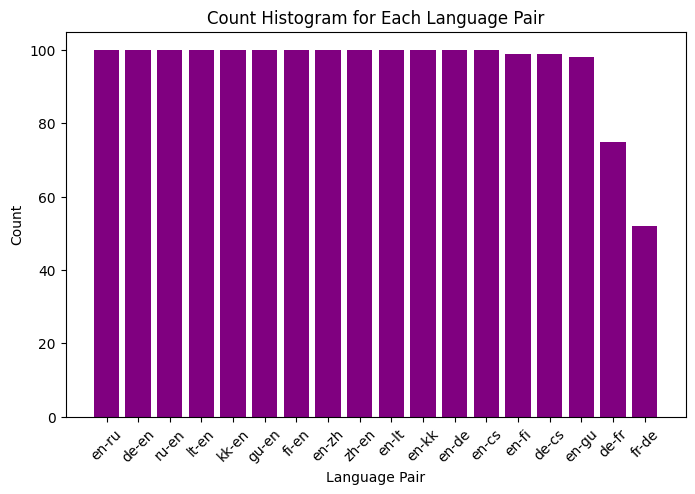

In [6]:
import matplotlib.pyplot as plt

count_df = wmt_da_df.groupby(["lp"]).size().reset_index(name="count")
sorted_count_df = count_df.sort_values(by="count", ascending=False)
plt.figure(figsize=(8, 5))
plt.bar(
    sorted_count_df["lp"],
    sorted_count_df["count"],
    color="purple",
)
plt.xlabel("Language Pair")
plt.ylabel("Count")
plt.title("Count Histogram for Each Language Pair")
plt.xticks(rotation=45)
plt.show()

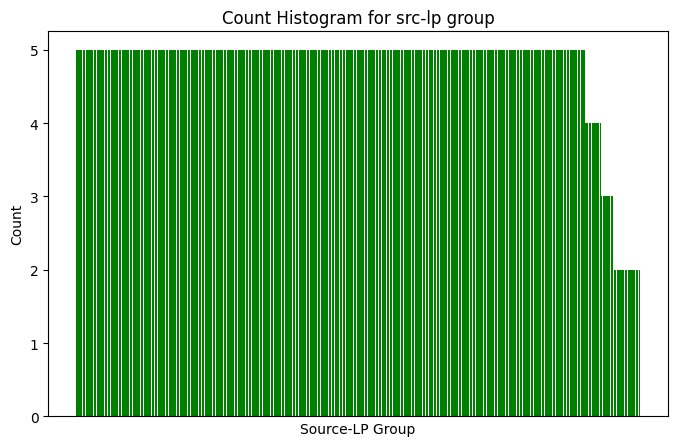

In [7]:
count_df = wmt_da_df.groupby(["src", "lp"]).size().reset_index(name="count")
sorted_count_df = count_df.sort_values(by="count", ascending=False)
plt.figure(figsize=(8, 5))
plt.bar(
    np.arange(len(sorted_count_df)),
    sorted_count_df["count"],
    color="green",
)
plt.xlabel("Source-LP Group")
plt.ylabel("Count")
plt.title("Count Histogram for src-lp group")
plt.xticks([], rotation=45)
plt.show()

As you can see we have roughly 100 entries per language and around 5 hypothesis for each source/lp pair, making it overall uniform across the different categories.

For MT metrics, we will focus on [BLEU](https://aclanthology.org/P02-1040/), [BERTScore](https://arxiv.org/abs/1904.09675) and [COMET](https://aclanthology.org/2020.emnlp-main.213/) (not to be confused with many other methods and tools called by the same name 😉 such as [[1]](https://arxiv.org/abs/1906.05317) and [[2]](https://www.comet.com/site/)):

- **BLEU (BiLingual Evaluation Understudy)**:
    You have already seen **BLEU (BiLingual Evaluation Understudy)** in Week 6's exercise session. BLEU score measures the similarity between the gold reference and the generated candidate. 100 means they are a perfect match, and 0 means none of the n-gram precisions get fulfilled. Note that this range may change to 1.0 to 0.0 depending on the implementation. such as the huggingface `evaluate` one:

    - **bleu:** As you learned in the exercise, the BLEU score is calculated by comparing the $n$-grams and combining their average precisions from $n$=1 to $n$=4 with a brevity penalty.
    - **bleu-1:** Geometric mean of 1-gram precisions; it does not use the brevity penalty.
    - **bleu-4:** Geometric mean of 4-gram precisions; it does not use the brevity penalty.
    - **bleu-brevity-penalty:** The brevity penalty penalizes generated sentences that are *too short* compared to the closest reference length with exponential decay.
- For **BERTScore** and **COMET**, you will answer the following questions to better understand how they calculate the metrics.

#### 🎯 TODO: Go to `a3_mt_qa.md` and answer the Q1 and Q2.

### 3.2) NLG metric calculation

Now that you are exposed to parts of the dataset and the metrics, it's time to calculate scores over the generated hypotheses. You will now head to the `a3_mt_eval.py` and complete the *TODO* statements in the `calculate_metrics` function. In particular, you will be calculating [BLEU](https://huggingface.co/spaces/evaluate-metric/bleu), [BERTScore](https://huggingface.co/spaces/evaluate-metric/bertscore), and [COMET](https://huggingface.co/spaces/evaluate-metric/comet) with the linked huggingface evaluate functions. 

While a GPU may help speed up the calculation in this part, it is not necessary (it will take ~10-20 min on CPU). If you want to directly use the commandline to run the function, feel free to do `python a3_mt_eval.py` and not run the following cell. Otherwise, run the following cell to generate the `part3_metrics.json` file.

**Hint:** If you want to calculate each metric independently (*e.g.*, by commenting out the code for metrics you have already calculated) and save them in different files that's okay, you don't have to make the following work necessarily in one go. Just make sure they get eventually saved in a joint file called `part3_metrics.json` so that you can use it for correlation calculation; and make sure all of your code is uncommented at submission time.

In [9]:
from a3_mt_eval import calculate_metrics

calculate_metrics()

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 50533.78it/s]
Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../../.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
Encoder model frozen.
/Users/saidgurbuz/miniconda3/envs/cs-552-a3/lib/python3.10/site-packages/pytorch_lightning/core/saving.py:188: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


--------------------------------------------------
Calculating BLEU...


100%|██████████| 1723/1723 [00:02<00:00, 766.13it/s]


Done.
--------------------------------------------------
Calculating BERTScore...


  0%|          | 0/100 [00:00<?, ?it/s]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  0%|          | 0/100 [00:00<?, ?it/s]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  0%|          | 0/100 [00:00<?, ?it/s]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██

Done.
--------------------------------------------------
Calculating COMET...
Done.


{'bleu': {'9841': 0.0,
  '9842': 0.0,
  '9843': 0.0,
  '9844': 0.0,
  '9845': 0.0,
  '9846': 0.0,
  '9847': 0.0,
  '9848': 0.0,
  '9849': 0.0,
  '9850': 0.0,
  '9941': 0.6147881529512643,
  '9942': 0.3850322886878713,
  '9943': 0.0,
  '9944': 0.6262844962765468,
  '9945': 0.45077634573237174,
  '9946': 0.17070057360194496,
  '9947': 0.2630438273136112,
  '9948': 0.12429356665051385,
  '9949': 0.2590871538943314,
  '9950': 0.2181359087876921,
  '10056': 0.0,
  '10057': 0.32559641262003014,
  '10058': 0.20149416157064579,
  '10059': 0.2490328638846773,
  '10060': 0.0,
  '10136': 0.10458892692943761,
  '10137': 0.29882396932767114,
  '10138': 0.586858809641322,
  '10139': 0.35249008608213545,
  '10140': 0.2660656499435371,
  '10171': 0.2094841271665114,
  '10172': 0.33157961519920826,
  '10173': 0.2519460242629816,
  '10174': 0.0,
  '10175': 0.0,
  '10201': 0.28895171772257205,
  '10202': 0.3571363417889781,
  '10203': 0.1146994166570641,
  '10204': 0.2056425935018132,
  '10205': 0.150368

Here's a quick assertion statement to make sure that your generated file is correctly formatted:

In [10]:
from a3_mt_eval import load_json

metric_dict = load_json("part3_metrics.json")
k_list = list(metric_dict.keys())
assert set(k_list) == set(
    [
        "bleu",
        "bleu-1",
        "bleu-4",
        "bertscore-precision",
        "bertscore-recall",
        "bertscore-f1",
        "comet",
    ]
)
for k in k_list:
    assert isinstance(metric_dict[k], dict)
    assert len(metric_dict[k]) == 1723
    assert "3" in metric_dict[k].keys()
    assert isinstance(metric_dict[k].get("3"), float)

### 3.3) Correlation calculation

We have succesfully calculated the NLG metrics for each hypothesis and stored them in `part3_metrics.json`. Now, we will calculate how much these scores correlate with human judgements in the `evaluate_metrics` function in `a3_mt_eval.py`. We will calculate [Kendall's tau](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient) which requires ordinal, or in other words, ranked associations between data. One way we can turn the DA scores into ranks is to consider the human scores for various hypothesis of the same **source** and **language pair** as defining such ranks. For that you will create (worst_hypothesis, better_hypothesis) pair combinations. After getting the data you will calculate the correlation between the human scores and the metric scores and save it in `part3_corr.json`.

Note that there are several ways to calculate Kendall's tau, we would like you to implement the first definition given in [this Wikipedia article](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient). You won't be penalized if you calculate a different version, but the results may differ.

You will not need a GPU for this portion of the task. Similar to calculating the scores in the previous subsection, if you want to directly use the commandline to run the function, feel free to do set `already_predicted_scores=True` in the main function and run `python a3_mt_eval.py` instead of the following cell. Otherwise, run the following cell to generate the `part3_corr.json` file:

In [12]:
from a3_mt_eval import evaluate_metrics

evaluate_metrics()

   entry_id     lp                                   src  \
0      9841  de-cs  18 Löcher, um ein Zeichen zu setzen.   
1      9842  de-cs  18 Löcher, um ein Zeichen zu setzen.   
2      9843  de-cs  18 Löcher, um ein Zeichen zu setzen.   
3      9844  de-cs  18 Löcher, um ein Zeichen zu setzen.   
4      9845  de-cs  18 Löcher, um ein Zeichen zu setzen.   

                                  mt                        ref     score  \
0                18 jamek na ceduli.  18 jamek na to se ukázat. -0.922435   
1       18 děr, aby se dalo bojovat.  18 jamek na to se ukázat. -1.615103   
2             18 jamek pro označení.  18 jamek na to se ukázat. -1.736768   
3  18 díry, aby se dalo dát znamení.  18 jamek na to se ukázat. -1.008528   
4               18 jamek na znamení.  18 jamek na to se ukázat.  0.461584   

    raw  annotators domain  year  
0  51.0           1   news  2019  
1   2.0           1   news  2019  
2   9.0           1   news  2019  
3  49.0           1   news  2019  
4

Here's a quick assertion statement to make sure that your generated file is correctly formatted:

In [13]:
from a3_mt_eval import load_json

corr_dict = load_json("part3_corr.json")
k_list = list(corr_dict.keys())
assert set(k_list) == set(
    [
        "bleu",
        "bleu-1",
        "bleu-4",
        "bertscore-precision",
        "bertscore-recall",
        "bertscore-f1",
        "comet",
    ]
)
for k in k_list:
    assert isinstance(corr_dict[k], float)

Awesome! ✨ All you have left to do now is to analyze the results.

### 3.4) Correlation analysis

Here is a sorted version of the results you got:

In [14]:
from a3_mt_eval import load_json

corr_dict = load_json("part3_corr.json")
dict(sorted(corr_dict.items(), key=lambda item: item[1]))

{'bleu-4': 0.13309459862727543,
 'bleu': 0.14891077290361085,
 'bleu-1': 0.1539838854073411,
 'bertscore-recall': 0.22799164428528798,
 'bertscore-f1': 0.2321695016413011,
 'bertscore-precision': 0.23515368546702478,
 'comet': 0.28857057594747837}

#### 🎯 TODO: Go to `a3_mt_qa.md` and answer the Q3 and Q4.

## **PART 4: Checklist**
---

<div style="padding:15px 15px 15px 15px;border-left:3px solid #8e7cc3;background-color:#e4e1eb;border-radius: 15px;color:#424242;">

🎉 Excellent work! You just reached the end of the assignment. 

To give us the deliverables you will have to commit the following files to your github classroom repository:

- ✅ The jupyter notebook: `a3_notebook.ipynb`

- ✅ The python files:
    - [x] `a3_utils.py`, if you added any helper functions
    - [x] `a3_decoding.py`
    - [x] `a3_sampling.py`
    - [x] `a3_contrastive_decoding.py`
    - [x] `a3_contrastive_main.py`
    - [x] `a3_mt_eval.py`

- ✅ The Part 3 open answer MD file: `a3_mt_qa.md`

- ✅ The JSON files generated in Parts 2 & 3: 
    - [x] `part2_contrastive_generations.json`
    - [x] `part2_greedy_generations.json`
    - [x] `part3_metrics.json` 
    - [x] `part3_corr.json`

</div>